In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("spam_or_not_spam.csv")

In [5]:
display(df.head())

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
print(df.isnull().sum())

email    1
label    0
dtype: int64


In [20]:
df = df.dropna(subset=['email'])

In [15]:
df['email'] = df['email'].astype(str)

In [16]:
print("Dataset shape after cleaning :", df.shape)

Dataset shape after cleaning : (2999, 2)


In [26]:
X = df['email']
y = df['label']

In [27]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_tfidf = tfidf.fit_transform(X).toarray()

print("Shape after TF-IDF:", X_tfidf.shape)


Shape after TF-IDF: (2999, 5000)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 2399
Testing samples: 600


In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
#Model Building

In [44]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=lr)

In [45]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

lr = 0.00
optimizer = Adam(learning_rate=lr)

model.compile(
    optimizer= optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Model Training

In [47]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9297 - loss: 0.1822 - val_accuracy: 0.9854 - val_loss: 0.0803
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9979 - loss: 0.0097 - val_accuracy: 0.9917 - val_loss: 0.0534
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9833 - val_loss: 0.0930
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.9917 - val_loss: 0.0637
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 2.8092e-04 - val_accuracy: 0.9896 - val_loss: 0.0759
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 7.7796e-05 - val_accuracy: 0.9896 - val_loss: 0.0796
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 1.0054e-04 - val_accuracy: 0.9896 - val_loss: 0.0798
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 1.6306e-04 - val_accu

In [40]:
# Model Evaluation

In [48]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [49]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.995

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      0.98      0.98       100

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

Confusion Matrix:

[[499   1]
 [  2  98]]


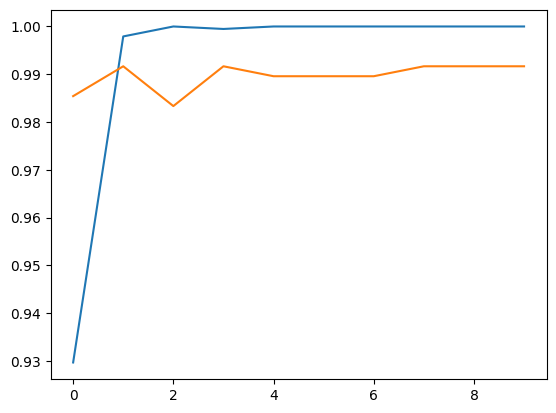

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

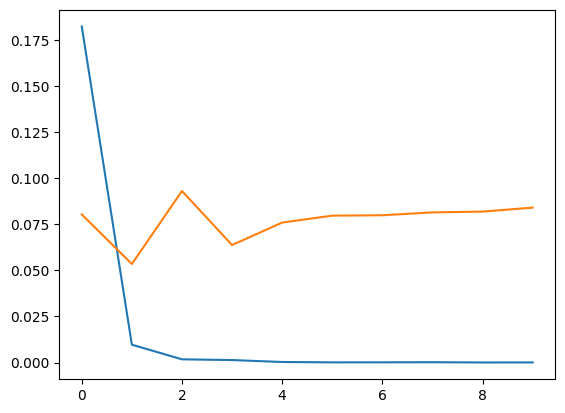

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])